In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import usefulFns


def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt

<IPython.core.display.Javascript object>


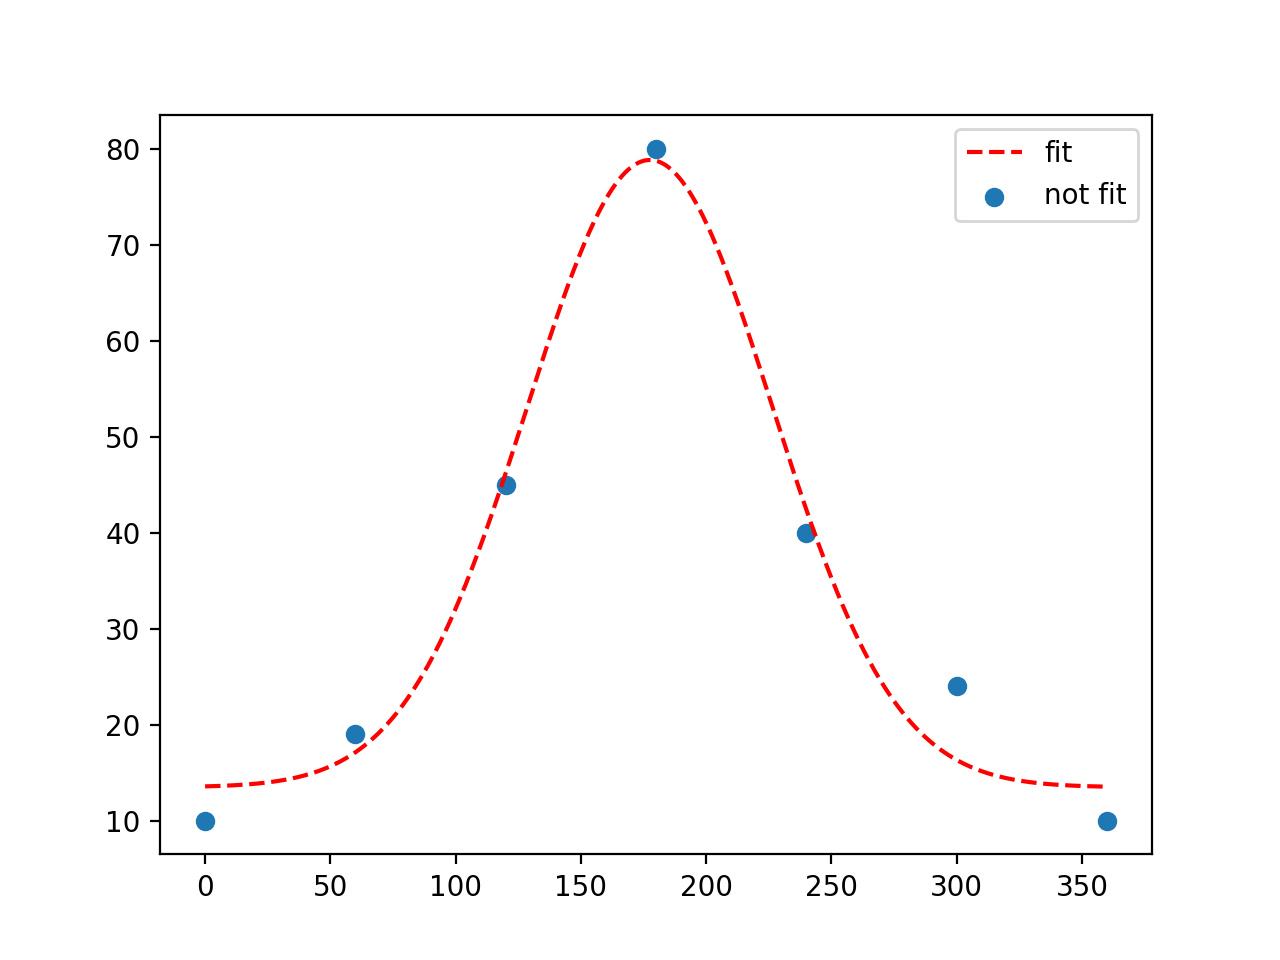

In [21]:
%matplotlib notebook
tc = np.array([10,19,45,80,40,24,10])
x = np.array([0,60,120,180,240,300,360])
x_full = np.linspace(0, 360, 1000)
params = gauss_fit(x, tc)
y_full_fit = gauss(x_full, *params)

plt.plot(x_full, y_full_fit, '--r', label='fit')
plt.scatter(x, tc, label= 'not fit')
plt.legend()

In [2]:
from usefulFns import *

In [3]:
tunMat, tcDict = randTuningCurve(5)

In [4]:
tunMat

array([[360.        , 420.        , 480.        , 540.        ,
        600.        , 660.        ],
       [ 46.07646726,  26.784962  ,  21.70849475,  35.92353274,
         55.215038  ,  60.29150525],
       [ 22.67768848,  29.03928111,  51.36159263,  67.32231152,
         60.96071889,  38.63840737],
       [ 38.91653483,  14.92267944,   9.0061446 ,  27.08346517,
         51.07732056,  56.9938554 ],
       [ 67.63588335,  48.76395247,  25.12806912,  20.36411665,
         39.23604753,  62.87193088],
       [ 47.3260714 ,  60.98305322,  57.65698182,  40.6739286 ,
         27.01694678,  30.34301818]])

636.5427514802882 -45.47875193547346
554.3215146357619 75.78272003555558
636.2317003107851 46.41114450549102
520.7287006552514 84.64495369785001
437.9220550722888 69.87506384954273


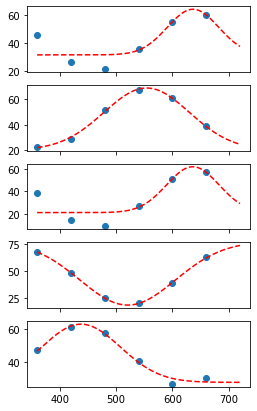

In [5]:
fig, ax = plt.subplots(nrows=len(tunMat)-1, ncols=1, sharex=True, figsize=(4,7))
for figC, i in enumerate(range(1, len(tunMat))):
    xFull = np.linspace(360,720,1000)
    params = gauss_fit(tunMat[0], tunMat[i])
    print(params[2], params[3])
    yFull = gauss(xFull, *params)
    ax[figC].plot(xFull, yFull, '--r')
    ax[figC].scatter(tunMat[0],tunMat[i])